# Support Vector Machines

# HOMEWORK7_GROUP4



- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

## Part 1: Watch Prof. Abu-Mostafa’s Lectures [4] and explain what margin and non-margin support vectors are.

## Part 2: Create a binary classification problem using sklearn.datasets.make_moons. Build an SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on the model performance.

# Part-2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [6]:


# Generate the dataset using make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Create a pandas DataFrame
df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])
df['Target'] = y  # Add the target variable to the DataFrame

In the make_moons dataset, the target variable is a binary label that indicates the class of each data point.

The two classes are:

Class 0: Represents points belonging to one of the moon shapes.

Class 1: Represents points belonging to the other moon shape.
The target variable is usually represented as an array of 0s and 1s, where:

A target value of 0 indicates that the point belongs to one moon (first class).
A target value of 1 indicates that the point belongs to the other moon (second class).

In [7]:
df

,Feature1,Feature2,Target
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0
...,...,...,...
95,0.187867,-0.146732,1
96,0.936777,-0.518322,1
97,0.550221,0.724004,0
98,1.887397,-0.013234,1


In [8]:


import altair as alt

# Create a scatter plot with Feature1 and Feature2 on the x and y axes, respectively, and color by Target
chart = alt.Chart(df).mark_circle().encode(
    x='Feature1',
    y='Feature2',
    color='Target'
)

# Display the chart
chart

alt.Chart(...)

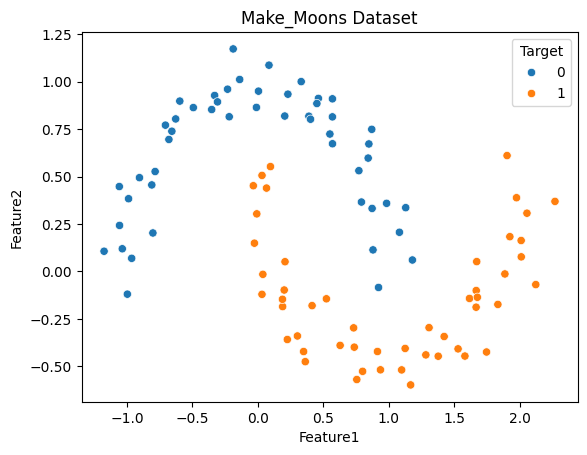

In [9]:
# Visualize the data using Seaborn
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df)
plt.title('Make_Moons Dataset')
plt.show()

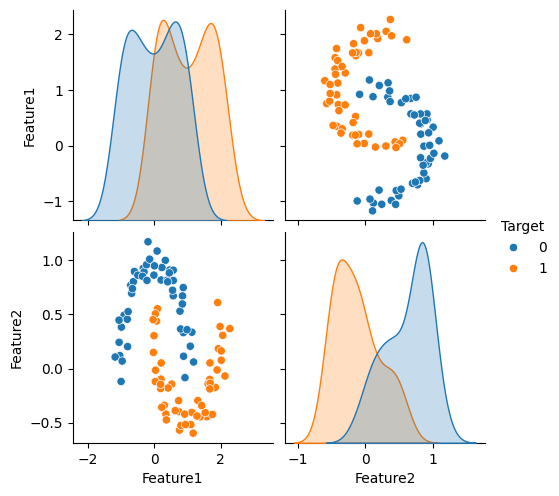

In [10]:

# Create a pairplot to visualize the relationships between variables
sns.pairplot(df, hue='Target')
plt.show()

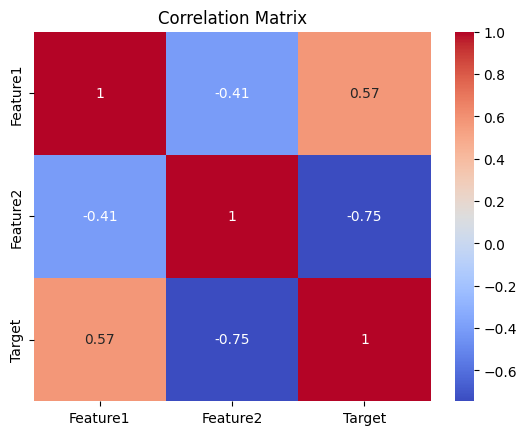

In [11]:
# Create a correlation matrix heatmap to understand the relationships between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#scaling the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Using linear kernel with hyperparameter c=1000

In [44]:

model = SVC(kernel="linear", C=1000)
model.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [45]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8571428571428571

In [46]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8666666666666667

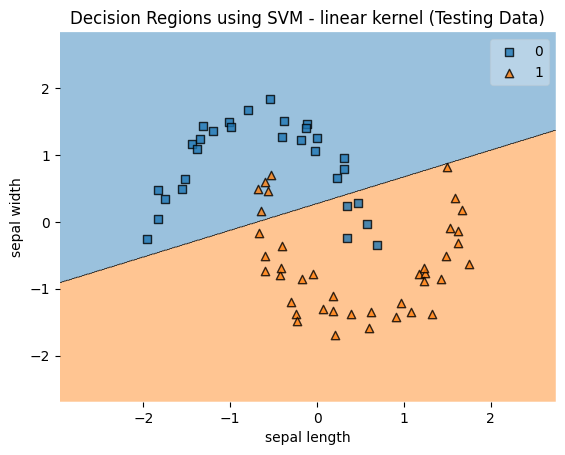

In [47]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Testing Data)');

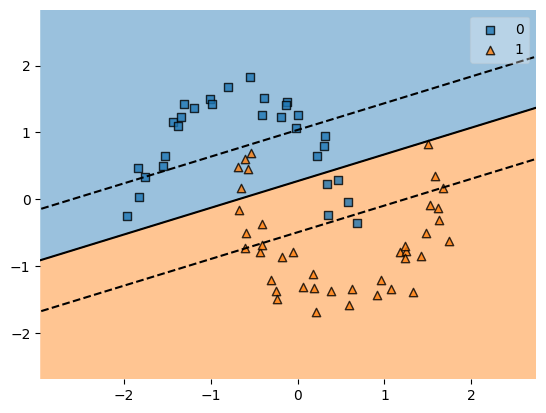

In [48]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [49]:
model.support_vectors_

array([[ 0.22777642,  0.65247024],
       [-1.96250346, -0.25114113],
       [ 0.34137196,  0.22901819],
       [-1.82945805,  0.03844923],
       [ 0.31369838,  0.95228369],
       [ 0.4660306 ,  0.28616184],
       [ 0.30759744,  0.79373735],
       [ 0.34905059, -0.23592661],
       [-1.75191671,  0.33811041],
       [ 0.68780065, -0.34933573],
       [ 0.57627693, -0.03830576],
       [-0.64983264,  0.16820012],
       [-0.532332  ,  0.6983833 ],
       [-0.60493602,  0.59933584],
       [-0.67960927,  0.4837871 ],
       [ 1.6724662 ,  0.17562633],
       [ 1.50143467,  0.82193582],
       [-0.60521383, -0.73445681],
       [-0.59761859, -0.51013132],
       [-0.56617491,  0.45729926],
       [ 1.58264349,  0.34914757],
       [-0.67023809, -0.16068501],
       [-0.40715839, -0.36853446]])

# linear kernel with c=10

In [53]:
model = SVC(kernel="linear", C=10)
model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [54]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8571428571428571

In [55]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8666666666666667

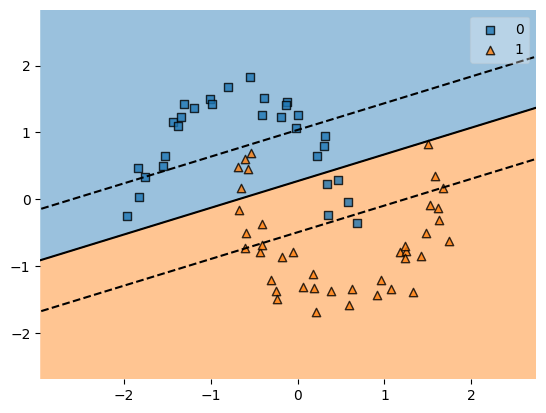

In [52]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# with polynomial kernel and degree=3

In [56]:
model = SVC(kernel="poly", degree=3)
model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [57]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9

In [58]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9

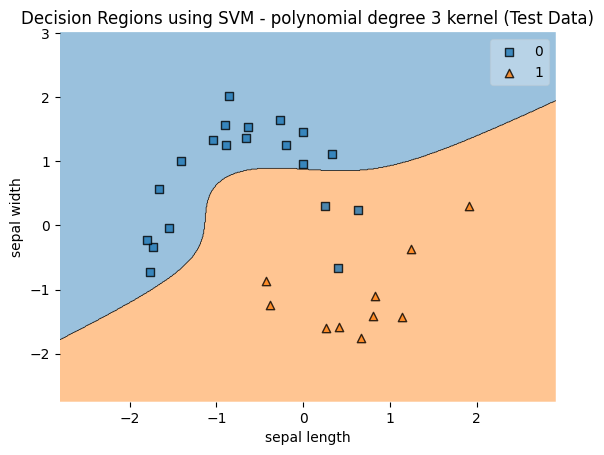

In [59]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - polynomial degree 3 kernel (Test Data)');

# Using RBF kernel and gamma=0.1

In [60]:
model = SVC(kernel="rbf", gamma=0.1)
model.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

In [61]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8571428571428571

In [62]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8666666666666667

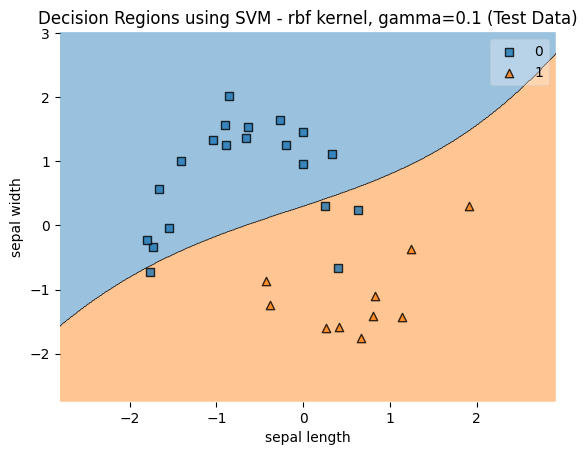

In [63]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=0.1 (Test Data)');

# Using RBF kernel with gamma=10

In [75]:
model = SVC(kernel="rbf", gamma=10)
model.fit(X_train_scaled, y_train)

SVC(gamma=10)

In [76]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

1.0

In [77]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9666666666666667

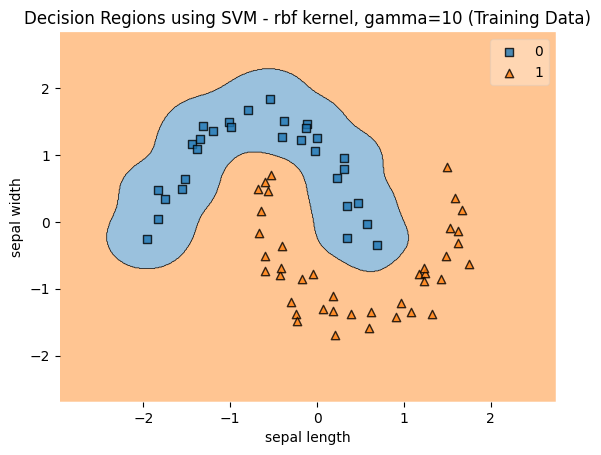

In [78]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=10 (Training Data)');

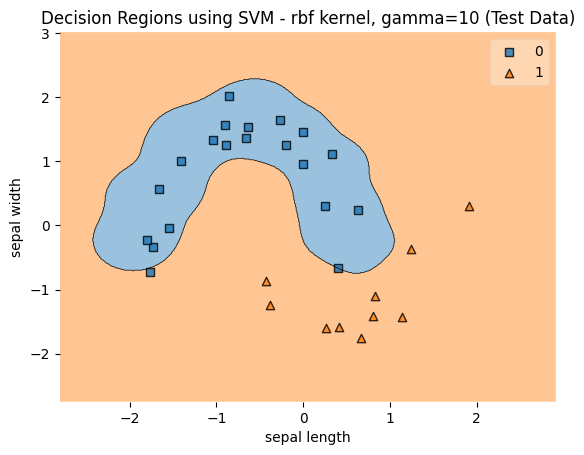

In [79]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=10 (Test Data)');

# Using RBF kernel with C=10, gamma=100

In [125]:
model = SVC(kernel="rbf",C=10, gamma=100)
model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=100)

In [126]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

1.0

In [128]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5

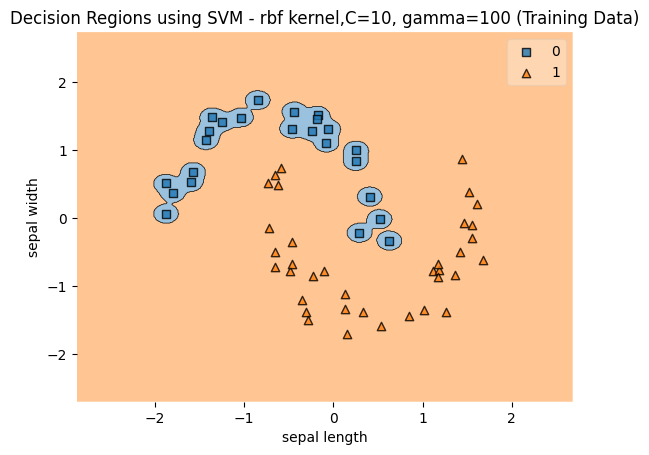

In [129]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel,C=10, gamma=100 (Training Data)');

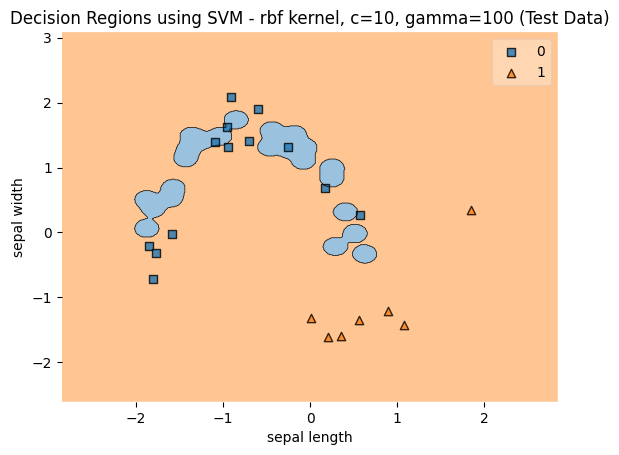

In [130]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, c=10, gamma=100 (Test Data)');

# RBF kernel with C=1 and gamma=scale as Hyperparameters

In [101]:
model = SVC(kernel="rbf", C=1, gamma="scale")
model.fit(X_train_scaled, y_train)


SVC(C=1)

In [102]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9714285714285714

In [103]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9666666666666667

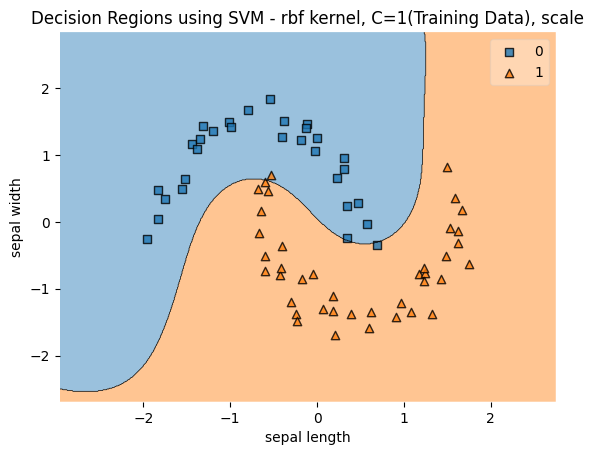

In [104]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, C=1(Training Data), scale');

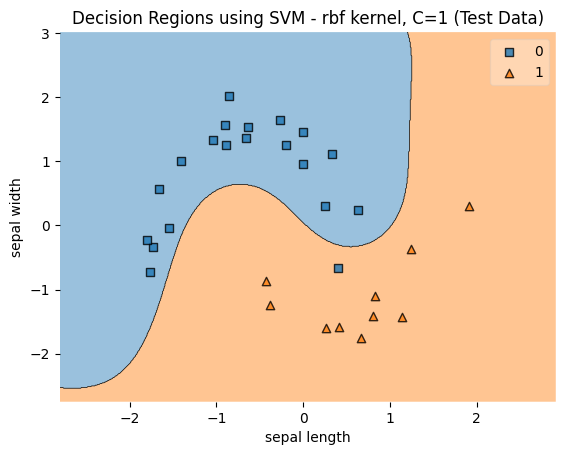

In [86]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, C=1 (Test Data)');

# RBF kernel with C=10 and gamma=scale

In [105]:
model = SVC(kernel="rbf", C=10, gamma="scale")
model.fit(X_train_scaled, y_train)

SVC(C=10)

In [106]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

1.0

In [107]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

1.0

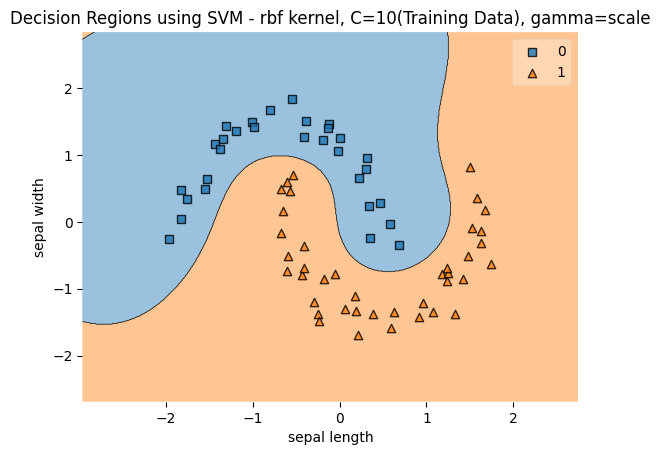

In [111]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, C=10(Training Data), gamma=scale');

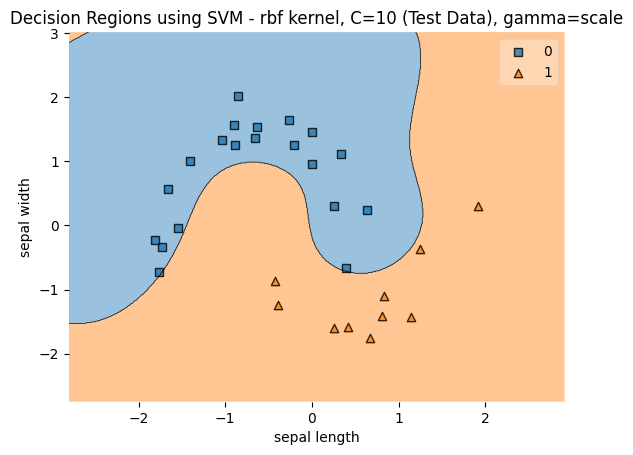

In [110]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, C=10 (Test Data), gamma=scale');

# Using GridSearchCV and RandomizedSearchCV to find the best set of hyperparameters (c and gamma values) and finding testing accuracy using one of those methods.

In [122]:


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 'scale']}

model = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best Score (GridSearchCV):", grid_search.best_score_)


# Define the parameter grid for RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 'scale']}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Score (RandomizedSearchCV):", random_search.best_score_)



Best Parameters (GridSearchCV): {'C': 10, 'gamma': 'scale'}
Best Score (GridSearchCV): 1.0
Best Parameters (RandomizedSearchCV): {'gamma': 'scale', 'C': 10}
Best Score (RandomizedSearchCV): 1.0


In [120]:
# Use the best model from GridSearchCV or RandomizedSearchCV to make predictions on the Test data
best_model = grid_search.best_estimator_  # Or random_search.best_estimator_
y_pred_val = best_model.predict(X_test_scaled)

# Evaluate the model on the Test data
accuracy_val = accuracy_score(y_test, y_pred_val)
print("Test Accuracy:", accuracy_val)

Test Accuracy: 1.0


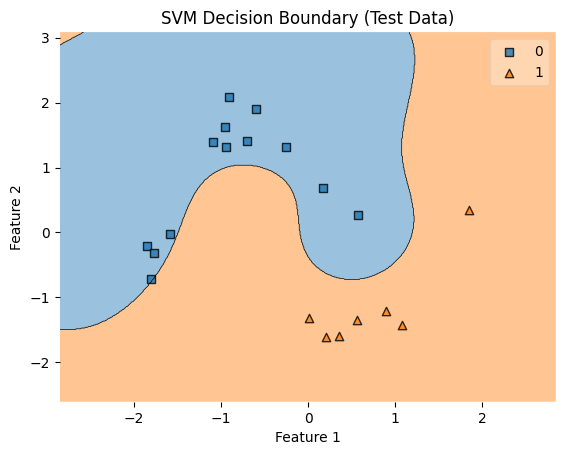

In [123]:
plot_decision_regions(X_test_scaled, y_test, clf=best_model)
plt.title('SVM Decision Boundary (Test Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()